# Análise Sobre os Acidentes nas Rodovias Federais do Brasil no Ano de 2019

In [1]:
# Importando as bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definindo um estilo para os gráficos:
sns.set(color_codes=True)
sns.set_context("paper",font_scale=2)
sns.set_style("white")

In [3]:
# Leitura da Base de Dados e transformação do tipo da coluna 'data_inversa':
df = pd.read_csv('Dataset/acidentes2019.csv', sep=';', encoding='latin-1', parse_dates=['data_inversa'])

# Mostrar todas as colunas da base:
pd.set_option('display.max_columns', None)

In [4]:
# Primeiras linhas do DataFrame:
df.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182256.0,403856.0,2019-01-01,terça-feira,04:00:00,CE,116.0,"136,9",RUSSAS,Animais na Pista,Atropelamento de Animal,Sem Vítimas,Amanhecer,Decrescente,Vento,Simples,Curva,Não,324937,Caminhão,I/MB 15SPRINT RONTAN AMB,2012.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,"-4,766018","-38,056034",SR-CE,DEL16/3,UOP01/CE
1,182263.0,402859.0,2019-01-01,terça-feira,05:00:00,MT,158.0,"599,5",AGUA BOA,Defeito Mecânico no Veículo,Incêndio,Sem Vítimas,Amanhecer,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,324940,Caminhão,FORD/CARGO 815 N,2011.0,Condutor,Ileso,30.0,Masculino,1,0,0,0,"-14,319","-52,169",SR-MT,DEL2/8,UOP02/MT
2,182277.0,402850.0,2019-01-01,terça-feira,10:00:00,PA,10.0,34,DOM ELISEU,Velocidade Incompatível,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Nublado,Simples,Não Informado,Não,324958,Caminhão-trator,VOLVO/FH 540 6X4T,2012.0,Condutor,Ileso,54.0,Masculino,1,0,0,0,"-4,15296734","-47,54608154",SR-PA,DEL19/2,UOP03/PA
3,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,101.0,13,RIO REAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Desvio Temporário,Não,324987,Caminhão-trator,SCANIA/R 440 A6X2,2018.0,Condutor,Ileso,43.0,Masculino,1,0,0,0,"-11,5896","-37,8761",SR-SE,DEL20/2,UOP03/SE
4,182307.0,402642.0,2019-01-01,terça-feira,13:50:00,BA,116.0,440,FEIRA DE SANTANA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Curva,Não,325030,Caminhão-trator,VOLVO/FH12 380 4X2T,2003.0,Passageiro,Lesões Graves,37.0,Masculino,0,0,1,0,"-12,344","-39,087",SR-BA,DEL10/2,UOP01/BA
5,182307.0,402638.0,2019-01-01,terça-feira,13:50:00,BA,116.0,440,FEIRA DE SANTANA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Curva,Não,325030,Caminhão-trator,VOLVO/FH12 380 4X2T,2003.0,Condutor,Lesões Leves,57.0,Masculino,0,1,0,0,"-12,344","-39,087",SR-BA,DEL10/2,UOP01/BA
6,182316.0,402361.0,2019-01-01,terça-feira,15:15:00,RS,101.0,8,TORRES,Falta de Atenção à Condução,Tombamento,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Sim,325039,Caminhão-trator,SCANIA/R124 GA6X4NZ 420,2004.0,Condutor,Ileso,28.0,Masculino,1,0,0,0,"-29,360483","-49,807865",SR-RS,DEL9/3,UOP03/RS
7,182334.0,402401.0,2019-01-01,terça-feira,14:45:00,SE,101.0,"76,7",MARUIM,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Reta,Não,325068,Caminhão,IVECO/TECTOR 240E25,2010.0,Condutor,Não Informado,NaN,Não Informado,0,0,0,0,"-10,7853","-37,1421",SR-SE,DEL20/1,UOP01/SE
8,182361.0,402521.0,2019-01-01,terça-feira,10:00:00,MG,251.0,280,SALINAS,Ultrapassagem Indevida,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Sol,Simples,Reta,Não,325052,Caminhão-trator,VOLVO/FH 440 6X2T,2011.0,Condutor,Lesões Leves,52.0,Masculino,0,1,0,0,"-16,12498503","-42,22251892",SR-MG,DEL4/11,UOP02/MG
9,182362.0,404322.0,2019-01-01,terça-feira,18:20:00,PE,101.0,41,IGARASSU,Ingestão de Álcool,Colisão lateral,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,325208,Caminhão,VW/8.140,1999.0,Condutor,Ileso,59.0,Masculino,1,0,0,0,"-7,837","-34,9124",SR-PE,DEL11/1,UOP02/PE


In [5]:
# Número de linhas e coluna:
df.shape

(162273, 35)

# Limpeza e transformação dos dados

Temos a coluna 'horario' que aparentemente contém o horário que o acidente ocorreu ou foi registrado. Sabemos que os períodos do dia são as divisões do dia em partes de seis horas, vamos usar isso para alterar oa valores da coluna fase_dia.

In [6]:
# Definindo os períodos do dia de acordo com a coluna 'horario':
df['fase_dia'].loc[(df['horario'] >= '06:00:00') & (df['horario'] <= '11:59:00')] = 'Manha'  
df['fase_dia'].loc[(df['horario'] >= '00:00:00') & (df['horario'] <= '05:59:00')] = 'Madrugada'  
df['fase_dia'].loc[(df['horario'] >= '12:00:00') & (df['horario'] <= '17:59:00')] = 'Tarde'  
df['fase_dia'].loc[(df['horario'] >= '18:00:00') & (df['horario'] <= '23:59:00')] = 'Noite'  

Várias colunas do dataframe não contém informações relevantes para a análise e serão removidas.


In [7]:
# Dropando as colunas:
def remove_features(lista_features):
    for i in lista_features:
        df.drop(i,axis=1,inplace=True)
remove_features(['id','pesid','horario','br','km','tracado_via','uso_solo','id_veiculo','marca','ano_fabricacao_veiculo','regional','delegacia','uop','classificacao_acidente','latitude','longitude'])        

Qual o tipo de cada uma das colunas do dataframe?

In [8]:
# Tipos da colunas:
df.dtypes

data_inversa              datetime64[ns]
dia_semana                        object
uf                                object
municipio                         object
causa_acidente                    object
tipo_acidente                     object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tipo_veiculo                      object
tipo_envolvido                    object
estado_fisico                     object
idade                            float64
sexo                              object
ilesos                             int64
feridos_leves                      int64
feridos_graves                     int64
mortos                             int64
dtype: object

Será que temos alguma coluna com valores faltantes?

In [9]:
# Verificando a quantidade de valores nulos no dataframe.
df.isnull().sum().sort_values(ascending=False)

idade                     15759
mortos                        0
condicao_metereologica        0
dia_semana                    0
uf                            0
municipio                     0
causa_acidente                0
tipo_acidente                 0
fase_dia                      0
sentido_via                   0
tipo_pista                    0
feridos_graves                0
tipo_veiculo                  0
tipo_envolvido                0
estado_fisico                 0
sexo                          0
ilesos                        0
feridos_leves                 0
data_inversa                  0
dtype: int64

Vamos analisar algumas informações estatísticas das colunas que são numéricas e categóricas. Essas informações serão importantes ao longo da análise.

In [10]:
# Variáveis numéricas:
df.describe()

,idade,ilesos,feridos_leves,feridos_graves,mortos
count,146514.000000,162273.000000,162273.000000,162273.000000,162273.000000
mean,39.879711,0.422954,0.372829,0.114455,0.032864
std,51.426590,0.494030,0.483559,0.318364,0.178282
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,1.000000,0.000000,0.000000
max,2018.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Variáveis categóricas:
df.describe(include=['O'])

,dia_semana,uf,municipio,causa_acidente,tipo_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tipo_veiculo,tipo_envolvido,estado_fisico,sexo
count,162273,162273,162273,162273,162273,162273,162273,162273,162273,162273,162273,162273,162273
unique,7,27,1767,24,16,4,3,10,3,24,6,5,4
top,domingo,MG,BRASILIA,Falta de Atenção à Condução,Colisão traseira,Tarde,Crescente,Céu Claro,Simples,Automóvel,Condutor,Ileso,Masculino
freq,27930,21380,2727,60672,38070,50252,87052,94822,85939,70650,112035,68634,114781


Vamos analisar cada uma das colunas e fazer algumas alterações caso necessário.

In [12]:
# Valores únicos da coluna 'tipo_veiculo':
df.tipo_veiculo.unique()

array(['Caminhão', 'Caminhão-trator', 'Reboque', 'Semireboque',
       'Automóvel', 'Motoneta', 'Bicicleta', 'Caminhonete', 'Camioneta',
       'Motocicleta', 'Utilitário', 'Micro-ônibus', 'Ônibus',
       'Ciclomotor', 'Outros', 'Carro de mão', 'Trator de rodas',
       'Trem-bonde', 'Triciclo', 'Carroça-charrete', 'Não Informado',
       'Quadriciclo', 'Trator misto', 'Trator de esteira'], dtype=object)

Temos alguns veículos que são subcategorias como Caminhão-trator que na verdade não deixa de ser um tipo de Caminhão, então a seguir vamos tratar isso.

In [13]:
# Tratando a coluna 'tipo_veiculo':
df.tipo_veiculo.replace(['Caminhão-trator','Camioneta','Motoneta','Trem-bonde'],['Caminhão','Caminhonete','Motocicleta','Trem'], inplace=True)
df.tipo_veiculo.replace(['Trator de rodas','Trator misto','Trator de esteira'],'Trator', inplace=True)
df.tipo_veiculo.replace(['Ciclomotor','Triciclo','Quadriciclo'],'Bicicleta', inplace=True)

Na coluna sexo temos 3 valores diferentes 'Masculino', 'Feminino' e 'Ignorado', considero mais apropriado alterar o 'Ignorado' por 'Não Informado'.

In [14]:
# Tratando a coluna 'sexo':
df.sexo.replace(['Ignorado'],'Não Informado', inplace=True)

Vamos visualizar entre quais faixas de idade à uma maior concentração de valores.

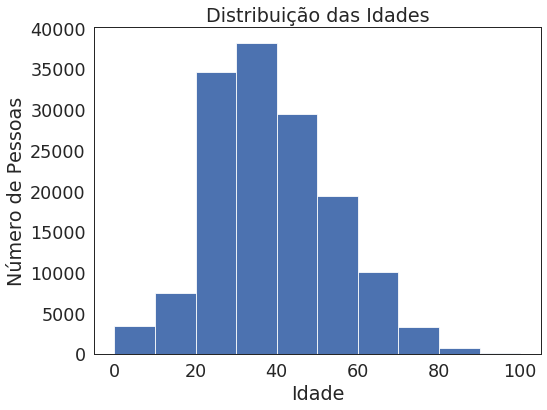

In [15]:
# Distribuição da coluna 'idade':
plt.figure(figsize=(8, 6))
plt.hist(df.idade, bins=range(0, 110,10), normed=False)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas');

A faixa de idades vai de 0 a 90 anos mais ou menos e a maior concentração de valores está entre 20 e 40 anos.

De acordo com a análise estatística das variáveis numéricas, a idade máxima é de 2018, claramente esse é um valor discrepante (Outliers), olhando apenas pela distribuição das idades isso não ficou muito claro, vamos usar o gráfico de boxplot que é apropiado para observar esses valores.

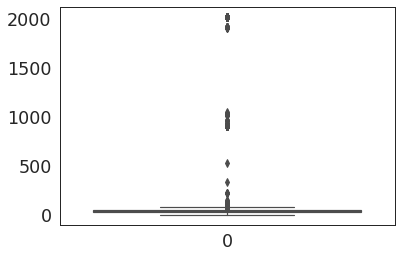

In [16]:
# Detectando os valores discrepantes da coluna 'idade':
sns.boxplot(data = df.idade, orient= 'v');

Ainda não foi possível visualizar de forma clara o quartil inferior e superior do boxplot, logo não sabemos quais valores se encontram fora da barreira externa, ou seja, os valores discrepantes. Vamos usar o cálculo do intervalo interquartil para achar esses valores.

In [17]:
# Quartil inferior e superior coluna 'idade'
def quartil():
    Q1 = df['idade'].quantile(q= 0.25)
    Q3 = df['idade'].quantile(q= 0.75)
    print(f'Q1 = {Q1} e Q3 = {Q3}')
    # Calculando a barreira externa.
    IIQ = Q3 - Q1
    limite_max = Q3 + 1.5 * IIQ
    limite_min = Q1 - 1.5 * IIQ
    print(f'Os Outliers da coluna idade estão entre {limite_min} e {limite_max}')
quartil()

Q1 = 27.0 e Q3 = 48.0
Os Outliers da coluna idade estão entre -4.5 e 79.5


Assim como vimos no describe Q1=27 (25%) e Q3=48 (75%), o limite inferior é de -4.5 mas não temos valores negativos nessa coluna, e o limite superior é de 79.5, valores acima do limite superior são considerados valores discrepantes.

Agora que já temos essas informações, vamos selecionar somente as idades que estão dentro do limite inferior e superior, uma pessoa não tem uma idade igual a 79.5 ou ela tem 79 anos ou ela tem 80 anos. Vou considerar apenas o valor inteiro, então iremos selecionar apenas as idades menores ou iguais a 79 anos.

In [18]:
# Selecionando somente as idades que estão dentro das extremidades (inferiores e superiores) do boxplot:
df = df.query('idade <= 79')

Vou utilizar o boxplot novamente para analisar se os valores discrepantes foram devidamente excluídos.

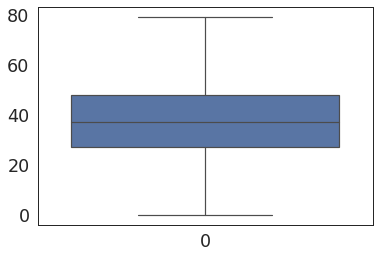

In [19]:
# Boxplot:
sns.boxplot(data = df.idade, orient= 'v');

Depois desse processo podemos observar pelo boxplot que não temos mais valores discrepantes nessa coluna, agora a próxima tarefa e preencher os valores nulos.

Escolhi preencher esses valores com a média da coluna e depois transformar o tipo dos dados para inteiro.

In [20]:
# Preenchendo os valores nulos da coluna 'idade'
df['idade'].fillna(df['idade'].mean(), inplace=True)
df['idade'] = df['idade'].astype('int')

Afim de identificar qual a faixa de idade que teve o maior número de mortos ou feridos por exemplo, vamos  agrupar as idades em algumas categorias para facilitar esse cálculo.

In [21]:
# Agrupando as idades em 4 categorias:
# 0-15 anos (Crianca) / 16-20 anos (Jovem) / 20-59 anos (Adulto) / 59-78 anos (Idoso)
df['idade'] = pd.cut(df['idade'],[0,15,20,59,78], labels=['Crianca','Jovem','Adulto','Idoso'])

Depois de todas as transformações e limpeza nos dados o dataframe já está pronto para uma análise exploratória.

In [22]:
# Últimas linhas do Dataframe final:
df.tail()

,data_inversa,dia_semana,uf,municipio,causa_acidente,tipo_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
162262,2019-04-23,terça-feira,PE,RIBEIRAO,Defeito na Via,Colisão com objeto estático,Manha,Decrescente,Garoa/Chuvisco,Dupla,Caminhonete,Condutor,Lesões Leves,Adulto,Masculino,0,1,0,0
162267,2019-11-25,segunda-feira,PR,FAZENDA RIO GRANDE,Falta de Atenção à Condução,Colisão lateral,Manha,Decrescente,Céu Claro,Dupla,Motocicleta,Passageiro,Ileso,Adulto,Masculino,1,0,0,0
162268,2019-11-25,segunda-feira,PR,FAZENDA RIO GRANDE,Falta de Atenção à Condução,Colisão lateral,Manha,Decrescente,Céu Claro,Dupla,Motocicleta,Condutor,Lesões Leves,Adulto,Masculino,0,1,0,0
162269,2019-06-03,segunda-feira,CE,CAUCAIA,Não guardar distância de segurança,Colisão traseira,Noite,Crescente,Céu Claro,Dupla,Automóvel,Condutor,Lesões Graves,Adulto,Masculino,0,0,1,0
162270,2019-06-03,segunda-feira,CE,CAUCAIA,Não guardar distância de segurança,Colisão traseira,Noite,Crescente,Céu Claro,Dupla,Automóvel,Condutor,Ileso,Adulto,Masculino,1,0,0,0


In [23]:
# Número de linhas e colunas:
df.shape

(145476, 19)

In [24]:
# Salvando o Dataframe:
df.to_csv('Acidentes.csv', sep=';', index=False)